# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

The smartcab never moved during the simulation. 

It was always stopped at the stop light. 

For the forty simiulations I ran the awards ranged from -6.92 to + 1.72. 

When not moving at a green light the driving was given a negative award. When properly stopped at a red light the driving agent was given a positive award. 

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

Three flags: learning, epsilon, and alpha and change the simulation as below:

learning - Determines whether the driving agent is expected to learn in the simulation. True = Learn, False = Do not Learn

epsilon  - Defined as a random exploration factor or in other words, the probability of the driving agent taking a random action. It factors into the decay equation as it sets the starting point for the decay (maximum probability of the driving agent taking a random action). As epsilon approaches 1, the probability of the driving taking a random action increases.
As epsilon approaches 0, the probability of the driving agent taking a random action decreases.
           
alpha    - defines the learning rate for the simulation. As alpha approaches 0, the driving agent learns less. Conversely, when alpha approaches 1, the driving agent gives more weight to the latest training trials and less weight to the earlier training trials. Adjusting alpha to either extremed (0 or 1) will degradate performance. 

Act is called when an agent performs an action.

render_text() is the non-GUI render display of the simulation. render() is the GUI render display of the simulation.

next_waypoint() considers the East-West direction first.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


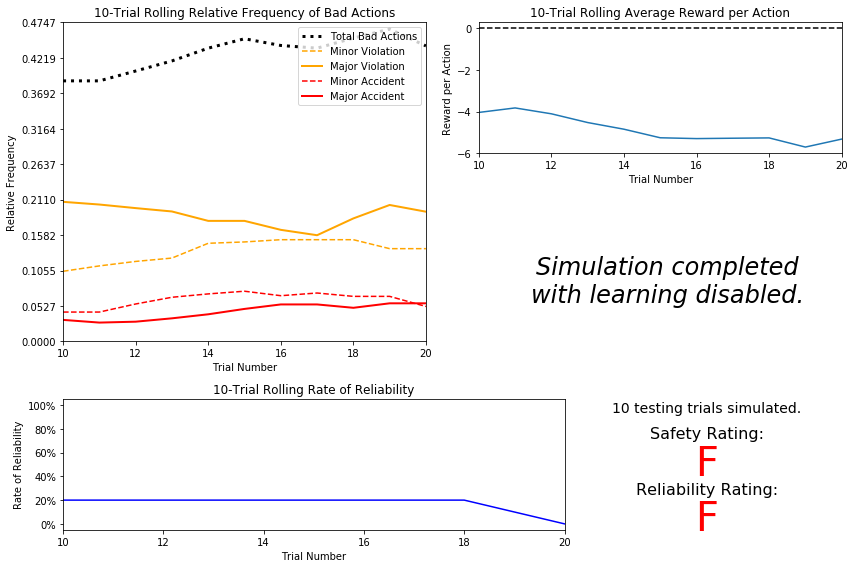

In [12]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

The driving agent is making bad decisions around 45% of the time (range 39 to 50%). The combined accident rate for major and minor accidents is around 13.5% (8.5% for major accidents and 5% for minor accidents). The proportion of bad decisions that lead to accidents is approximately 30%(13.5/45).  

The rate of reliability makes sense as the driver never reaches the destination without an accident. 

The rewards received by the driver are all negative and it appears the driver is heavily penalized. 

As the number of trials increases the result of the outcomes does not change significantly. 

This smartcab is not a safe option for passengers to take as it never reaches its destination without an accident. 

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

The features most relevant for learning both safety and efficiency are light, oncoming, and waypoint. 

Light and oncoming are critical to learn how to safely navigate to the destination without getting into an accident. For light, entering the intersection on a red light has a high probability of causing an accident. 

From the reference below:

"If drivers are approaching an intersection from opposite directions, the driver turning left must yield to approaching traffic going straight or turning right (traffic going straight or turning right has the right-of-way). Two drivers at an intersection that arrived at the same time at a right angle- the driver on the left must yield the right-of way. ( the driver on the right has the right of way)."

For oncoming, the when turning left, the driving agent must yield to the oncoming traffic going straight or truning right. 

Waypoint is essential to efficiently determine the next direction to head to get the the destination in the shortest time. 

I did not choose left or right as my assumption from observing the simulation is that vehicles approaching from the left are always stopped at a RED light when the light is GREEN for the SmartCab. I did not choose right as a feature as right of way rules indicate we do not need to be concerned as to what the vehicle on our right is doing. The assumption here is that all vehicles follow the right of way rules.

In addition, I ruled out deadline as a relevant feature as as it is neither a critical factor for safety nor is it a critical factor for efficiency. 

Reference: https://definitions.uslegal.com/r/right-of-way/

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

For the features I chose in question #4 above, there are 24 possible states for this simulation basis:

1) light - 2 options (red, green)
2) oncoming - 4 options (none, forward, left, right)
3) waypoint - 3 options (forward, left, right)

2 x 4 x 3 = 24 total number of states

Basis having only 24 possible states, I think the driving agent could learn a policy for each state within a reasonable number of training trials.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

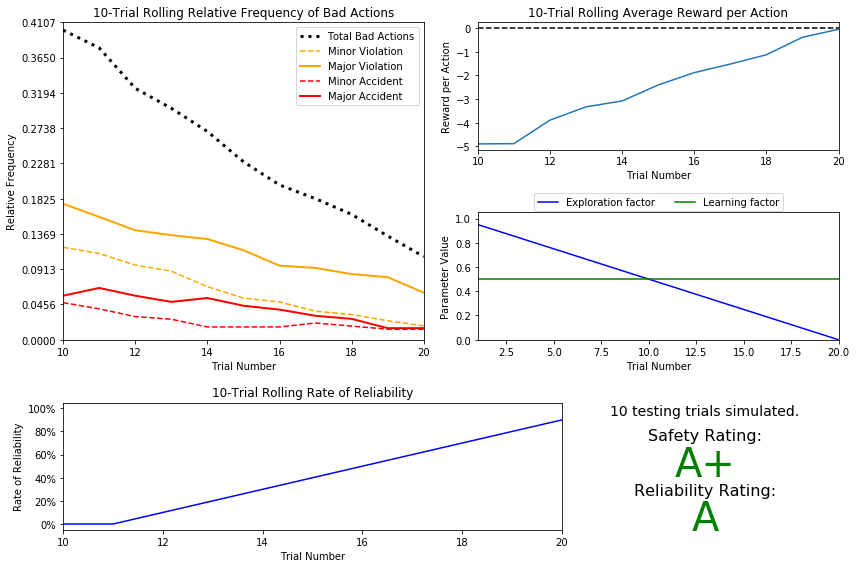

In [18]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

- The observations between the basic driving agent and the default Q-Learning agent are very different. In the basic driving  agent, the relative frequency of total bad actions, major/minor violations, and major/minor accidents remains basically constant throughout the 20 trials. This is in contrast to the default Q-Learning agent results where all these frequencies decreased as more trials were performed.

- In the Learning Agent, as epsilon is initialy set to 1 and the decay function is set to epsilon - .05, 20 training trials were performed before testing. This makes sense (20 x .05 = 1).

- Yes the parameters panel displays the linear decaying function (in blue) with a negative slope of .05/trial. 

- Yes. As the number of training trials increased, the number of bad actions significantly decreased while the average reward significantly increased.

- Safety rating improved significantly from "F" to "A+" as did reliability from "F" to "A". 

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

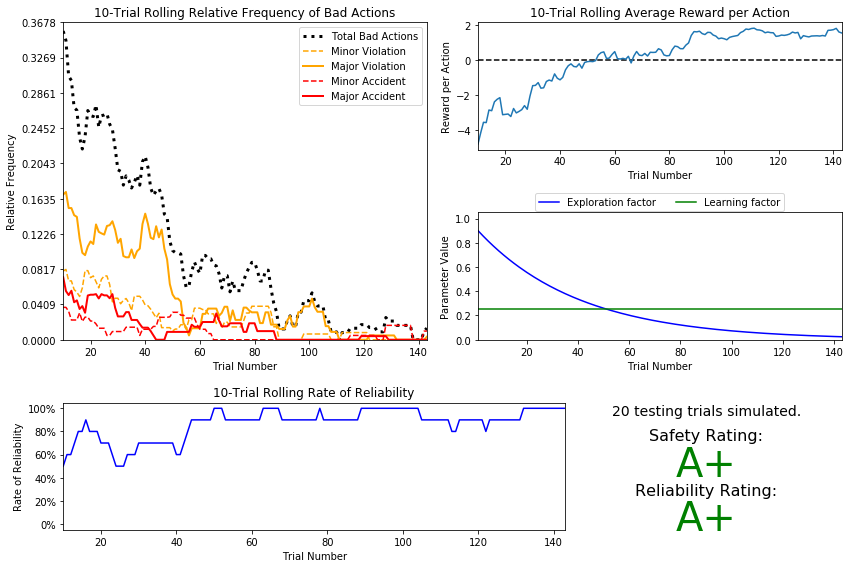

In [16]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

- I created an exponential decaying function for epsilon: self.epsilon = self.epsilon*(1-.025)**self.number_of_trials

- Approximately 143 training trials were completed before testing

- For epsilon-tolerance I used (0.90 and 0.025). For alpha I used 0.025. In order to improve the scores, I tried many simulations using different values for 'n_test', 'alpha', 'epsilon', and 'tolerance' and tracked the improvement in both safety and reliability rating. For a purely empirical standpoint, lowering epsilon (the random exploration factor) much below 0.9 resulted in decreased ratings. I beleive this is due to the reduction in the number of training trials performed and concomittantly the opportunities the driving to learn when starting at a lower epsilon and executing the exponential decaying function. Acting in the same way, raising tolerance above the default 0.05 results in a reduction in the number of training trials performed and concomittantly the opportunities the driving to learn, thus reducing the ratings.

- As for alpha(the learning factor), raising alpha above the default 0.50 resulted in decreased ratings. Lowering alpha below the default 0.50 resulted in improved ratings. And epsilon of 0.90 and an alpha of 0.25 seemed to provide the best balance between exploration and exploitation

- Safety remained the same at A+ while Reliability improved to A+

- Yes. I beleive my driving agent effectively learned an appropriate policy as both safey and reliability ratings hit he maximum A+ rating.

- Yes. Safety and reliability are the highest scores possible.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 

The table below displays the optimal policy for each of the 24 states I identified in question #5 above:

(Light,Oncoming,Waypoint)   - Optimal Action

('green',none',forward')    - Forward

('green',none',left')       - Left

('green',none',right')      - Right

('green',forward',forward') - Forward

('green',forward',left')    - None

('green',forward',right')   - Right

('green',left',forward')    - Forward

('green',left',left')       - Left

('green',left',right')      - Right

('green',right',forward')   - Forward

('green',right',left')      - Forward

('green',right',right')     - Right

('red',none',forward')      - None

('red',none',left')         - None

('red',none',right')        - Right

('red',forward',forward')   - None

('red',forward',left')      - None

('red',forward',right')     - Right

('red',left',forward')      - None

('red',left',left')         - None

('red',left',right')        - None

('red',right',forward')     - None

('red',right',left')        - None

('red',right',right')       - Right


2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?

/-----------------------------------------
| State-action rewards from Q-Learning
\-----------------------------------------

('green', None, 'right')
 -- forward : 1.09
 -- left : 0.62
 -- right : 2.19 <--- Correct
 -- None : -4.67

('green', 'right', 'left')
 -- forward : 0.64 <--- Correct
 -- left : -5.20
 -- right : -0.13
 -- None : -2.22

('red', None, 'forward')
 -- forward : -17.36
 -- left : -11.79
 -- right : -0.51
 -- None : 1.98 <--- Correct

('green', None, 'forward')
 -- forward : 2.03 <--- Correct
 -- left : 0.92
 -- right : 0.76
 -- None : -4.83

('green', 'left', 'left')
 -- forward : 0.74
 -- left : 1.63 <--- Correct
 -- right : 0.87
 -- None : -4.23

('red', 'left', 'left')
 -- forward : -14.00
 -- left : -2.30
 -- right : -4.87
 -- None : 1.63 <--- Correct

('red', 'forward', 'right')
 -- forward : -15.59
 -- left : -6.98
 -- right : -4.23 
 -- None : 1.37 <--- Incorrect (my optimal policy says the driving agent can make a right turn on red).

('green', 'forward', 'right')
 -- forward : 0.47
 -- left : -11.74
 -- right : 1.81 <--- Correct
 -- None : -1.11

('red', 'right', 'left')
 -- forward : -4.46
 -- left : -27.66
 -- right : 0.00
 -- None : 1.88 <--- Correct

('red', 'right', 'forward')
 -- forward : -4.66
 -- left : -30.25
 -- right : 0.08
 -- None : 2.05 <--- Correct

('green', 'forward', 'left')
 -- forward : 0.58 <--- Correct
 -- left : -11.71
 -- right : 0.27
 -- None : -2.31

('red', None, 'right')
 -- forward : -12.23
 -- left : -9.24
 -- right : -1.39 
 -- None : 0.44 <--- Incorrect (my optimal policy says the driving agent can make a right turn on red).

('red', None, 'left')
 -- forward : -14.34
 -- left : -18.30
 -- right : -0.82
 -- None : 1.62 <--- Correct

('green', 'left', 'forward')
 -- forward : 1.76 <--- Correct
 -- left : 0.96
 -- right : 0.07
 -- None : -3.08

('green', 'left', 'right')
 -- forward : 1.26
 -- left : 0.35
 -- right : 2.13 <--- Correct
 -- None : -3.98

('red', 'forward', 'left')
 -- forward : -10.14
 -- left : -17.32
 -- right : -3.41
 -- None : 1.99 <--- Correct

('green', 'right', 'right')
 -- forward : 0.00
 -- left : -5.12
 -- right : 1.53 <--- Correct
 -- None : -1.08

('red', 'right', 'right')
 -- forward : 0.00
 -- left : 0.00
 -- right : 1.79 <--- Correct
 -- None : 0.43

('red', 'left', 'right')
 -- forward : -20.32
 -- left : -10.80
 -- right : -4.57 
 -- None : 0.81 <--- Correct

('green', None, 'left')
 -- forward : 0.69
 -- left : 1.64 <--- Correct
 -- right : 0.31
 -- None : -5.00

('red', 'left', 'forward')
 -- forward : -8.55
 -- left : -17.49
 -- right : 0.63
 -- None : 1.64 <--- Correct

('green', 'right', 'forward')
 -- forward : 1.75 <--- Correct
 -- left : -8.55
 -- right : 0.39
 -- None : -2.34

('green', 'forward', 'forward')
 -- forward : 1.70 <--- Correct
 -- left : -11.27
 -- right : 0.21
 -- None : -3.31

('red', 'forward', 'forward')
 -- forward : -9.91
 -- left : -13.40
 -- right : 0.24
 -- None : 2.13 <--- Correct

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

As displayed above, of the 24 actions taken and recorded in the "sim_improved-learning.txt" file, 22 entries matched the optional actions for optimal policy. These entries demonstrate the optimal policy in that the action with the highest reward matches the optimal action from the policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Two entries did not match the optional actions for optimal policy. These entries do not demonstrate the optimal policy in that the action with the highest reward do not match the optimal action from the policy. The two that did not match ('red', 'forward', 'right') and ('red', 'none', 'right') involve making a right turn at a red light. My optimal policy says that 'right' is the optimal action where the action taken was actually 'None' in both cases. 

THe U.S Right of Way Rules state that a right turn on red is allowed after coming to a complete stop if no traffic is coming from the left.

In the first example where action and policy do not match,

('red', 'forward', 'right')
 -- forward : -15.59
 -- left : -6.98
 -- right : -4.23 
 -- None : 1.37 <--- Incorrect (my optimal policy says the driving agent can make a right turn on red).

('red', None, 'right')
 -- forward : -12.23
 -- left : -9.24
 -- right : -1.39 
 -- None : 0.44 <--- Incorrect (my optimal policy says the driving agent can make a right turn on red).

I suspect that my assumption of not choosing left as a feature due to my observation from the simulation that vehicles approaching from the left are always stopped at a RED light when the light is GREEN for the SmartCab may be incorrect.
As I have not included left as one of the features to evaluate in my optimal policy, it is possible the driving agent was involved in accidents when making right turns on red where traffic was coming from the left; and as such learned to avoid making a right turn on red. There is also the possiblity of the driving agent takine a random action which might be why 'None' was chosen. In retrospect, I may have considered 'left' as being a fourth feature as part of my optimal policy.


-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

In this Q-Learning investigation, the SmartCab is using the Markov decision process to determine the best action to take basis the state the Smartcab is in and the policy for that state. The Cab ONLY considers the next action to take and does not take into consideration all of the states the cab needs pass through to get to the destination. As mentioned above, use of "gamma" requires propagating positive rewards backwards from a future state to the current state. The Smartcab has no knowledge of the combined positive rewards to be gained by its next action in terms of passing through the all of the various combinations of states to reach its final destination.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.